In [2]:
import pandas as pd

data = pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

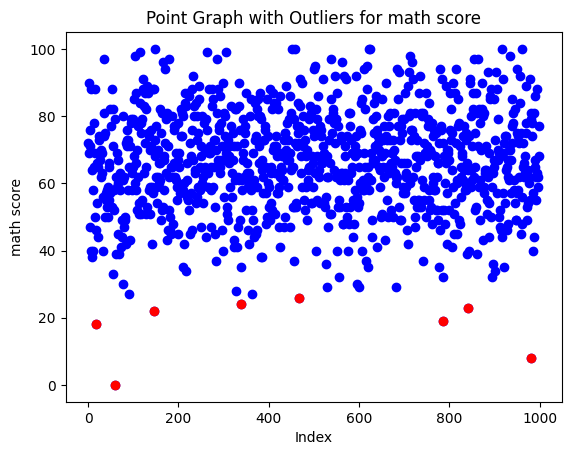

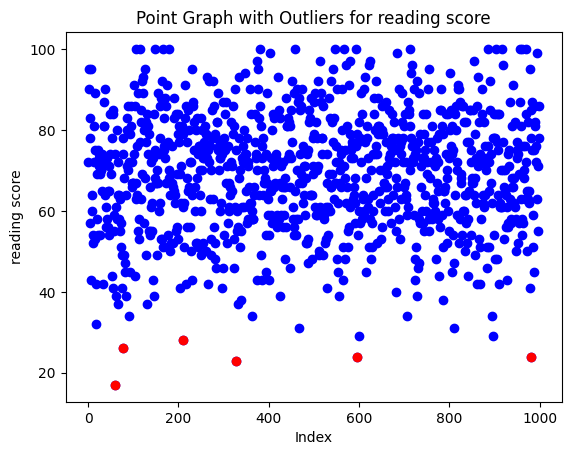

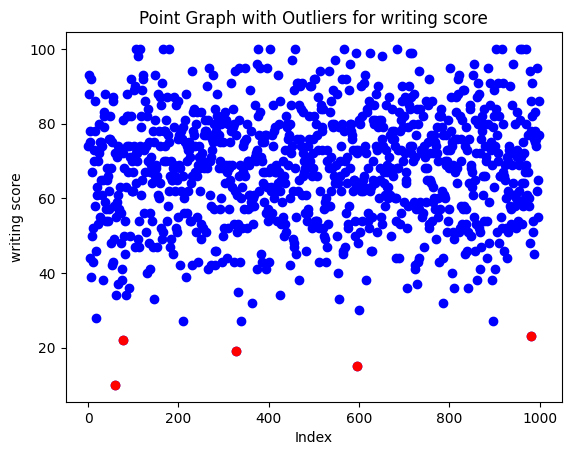

In [5]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_columns:
  """"using interquartile range method to determine the upper and lower
  limit for outliers"""
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  plt.figure()
  plt.scatter(data.index, data[col], color="blue")

  outliers = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))]
  plt.scatter(outliers.index, outliers[col], color="red")
  plt.xlabel("Index")
  plt.ylabel(col)
  plt.title(f"Point Graph with Outliers for {col}")
  plt.show()


In [6]:
# Replacing the outliers with the upper and lower bound values
for col in numeric_columns:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  data[col] = data[col].clip(lower_bound, upper_bound)




<ipython-input-8-e36b5169f55b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if not sns.distplot(data[col]).get_lines()[0].get_data()[1].any():
<ipython-input-8-e36b5169f55b>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


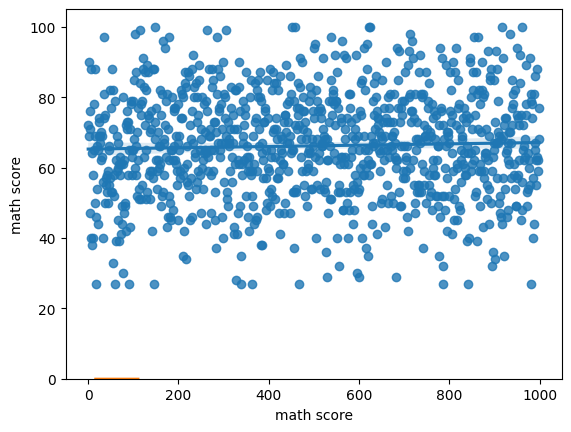

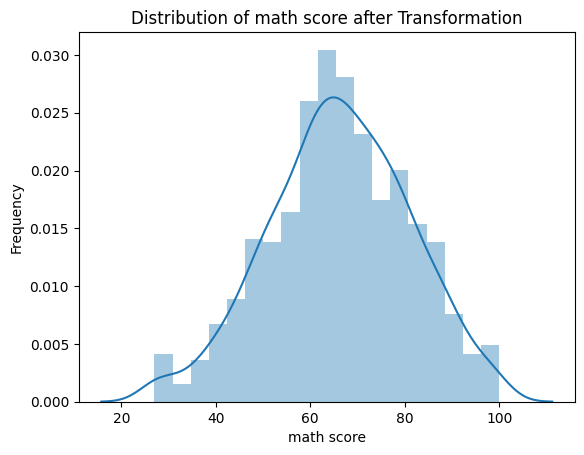

<ipython-input-8-e36b5169f55b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if not sns.distplot(data[col]).get_lines()[0].get_data()[1].any():
<ipython-input-8-e36b5169f55b>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


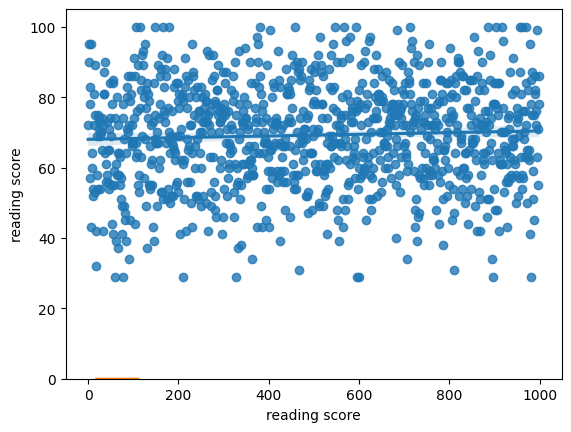

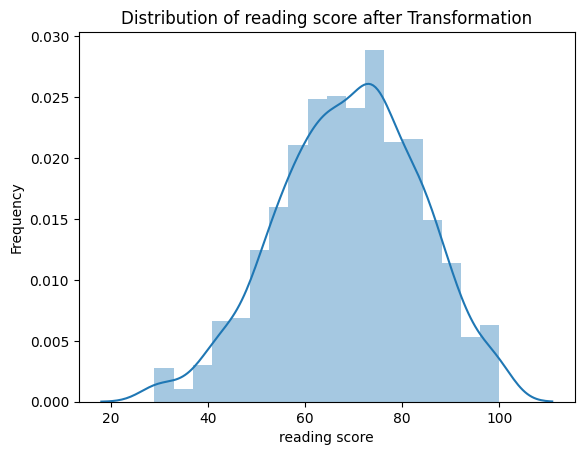

<ipython-input-8-e36b5169f55b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if not sns.distplot(data[col]).get_lines()[0].get_data()[1].any():
<ipython-input-8-e36b5169f55b>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


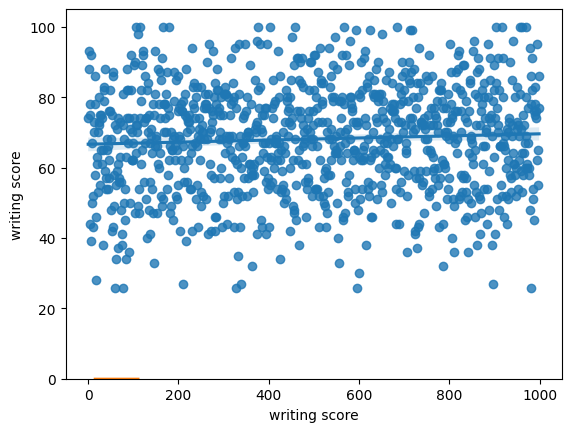

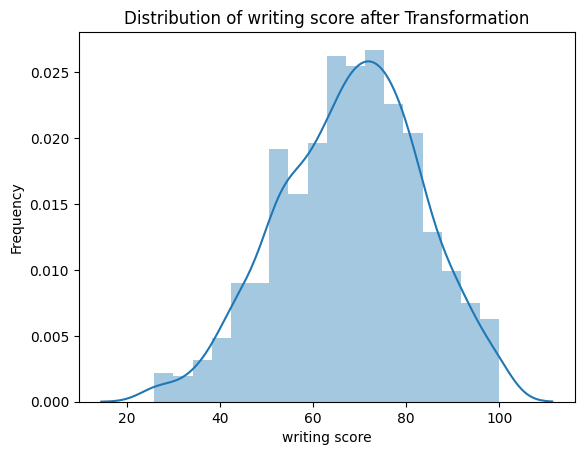

In [8]:
#applying log transformations for skewed data
import numpy as np
import seaborn as sns
for col in numeric_columns:
  skewness = data[col].skew()
  if abs(skewness) > 0.5:
    data[col] = np.log(data[col])
  if not sns.regplot(x=data.index, y=data[col]).get_lines()[0].get_data()[1].any():
    data[col] = np.sqrt(data[col])

  if not sns.distplot(data[col]).get_lines()[0].get_data()[1].any():
    data[col] = scipy.stats.boxcox(data[col])[0]

  plt.figure()
  sns.distplot(data[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col} after Transformation")
  plt.show()
